# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210512_batch_OLSmonths.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [53]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


## Functions

In [54]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):

    if HEX.shape == (112, 3):
        print(HEX.shape,": Shape is correct.")
    else:
        print(HEX.shape,": Shape is **INCORRECT!**")

    if HEX["CODIGO MUNICIPIO"].nunique() == 112:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is correct.")
    else:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is **INCORRECT!**")
        
    if any(HEX["NIDOS 2020"] < 0):
        print("**INCORRECT!** At least one municipality has NESTS <= 0.")
    else:
        print("Great! All municipalities have NESTS >= 0.")
    
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

## Get the data

In [55]:
QUEEN_train = pd.read_csv('../Feeder_months/WBds03_QUEENtrainMONTHS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_months/WBds03_QUEENpredictMONTHS.csv', sep=',')

clustersMario = pd.read_csv("../Feeder_years/WBds_CLUSTERSnests.csv")

In [56]:
#QUEEN_predict.isnull().sum()

In [57]:
QUEEN_train.shape

(2688, 43)

In [58]:
QUEEN_predict.shape

(1344, 43)

## Add in more Clusters (nest amount clusters)

In [59]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [60]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [61]:
QUEEN_train.shape

(2688, 44)

In [62]:
QUEEN_predict.shape

(1344, 44)

In [63]:
QUEEN_train.isnull().sum()

municip_name             0
municip_code             0
month                    0
year_offset              0
NESTS                    0
colonies_amount          0
food_fruit               0
food_apple               0
food_txakoli             0
food_kiwi                0
food_pear                0
food_blueberry           0
food_raspberry           0
station_code             0
station_name             0
weath_days_frost         0
weath_humidity           0
weath_maxLevel           0
weath_midLevel           0
weath_minLevel           0
weath_days_rain          0
weath_days_rain1mm       0
weath_accuRainfall       0
weath_10minRainfall      0
weath_1dayRainfall       0
weath_solar              0
weath_meanTemp           0
weath_maxTemp            0
weath_maxMeanTemp        0
weath_minTemp            0
weath_meanWindM          0
weath_maxWindM           0
weath_meanDayMaxWind     0
year                     0
population               0
cluster_size             0
cluster_cosmo            0
c

In [64]:
QUEEN_predict.isnull().sum()

municip_name             0
municip_code             0
month                    0
year_offset              0
NESTS                    0
colonies_amount          0
food_fruit               0
food_apple               0
food_txakoli             0
food_kiwi                0
food_pear                0
food_blueberry           0
food_raspberry           0
station_code             0
station_name             0
weath_days_frost         0
weath_humidity           0
weath_maxLevel           0
weath_midLevel           0
weath_minLevel           0
weath_days_rain          0
weath_days_rain1mm       0
weath_accuRainfall       0
weath_10minRainfall      0
weath_1dayRainfall       0
weath_solar              0
weath_meanTemp           0
weath_maxTemp            0
weath_maxMeanTemp        0
weath_minTemp            0
weath_meanWindM          0
weath_maxWindM           0
weath_meanDayMaxWind     0
year                     0
population               0
cluster_size             0
cluster_cosmo            0
c

## Determine feature importance

In [65]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code', 'station_name', 'year'])

In [66]:
y = QUEEN_train['NESTS']

In [67]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [68]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: month, Score: 1.54742
Feature: year_offset, Score: -1.62654
Feature: colonies_amount, Score: 1.64459
Feature: food_fruit, Score: 2.29941
Feature: food_apple, Score: -1.12020
Feature: food_txakoli, Score: 1.18769
Feature: food_kiwi, Score: -0.05182
Feature: food_pear, Score: 0.37333
Feature: food_blueberry, Score: 1.24348
Feature: food_raspberry, Score: 1.06059
Feature: weath_days_frost, Score: 0.51725
Feature: weath_humidity, Score: 1.43421
Feature: weath_maxLevel, Score: 1.84008
Feature: weath_midLevel, Score: -1.62255
Feature: weath_minLevel, Score: -0.88248
Feature: weath_days_rain, Score: -0.59654
Feature: weath_days_rain1mm, Score: 0.42149
Feature: weath_accuRainfall, Score: 1.64616
Feature: weath_10minRainfall, Score: -0.85979
Feature: weath_1dayRainfall, Score: -1.02334
Feature: weath_solar, Score: 0.05157
Feature: weath_meanTemp, Score: -8.89484
Feature: weath_maxTemp, Score: 0.55743
Feature: weath_maxMeanTemp, Score: 3.66499
Feature: weath_minTemp, Score: 9.49536
Feat

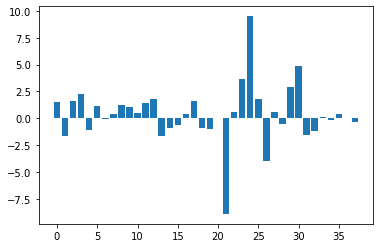

In [69]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [70]:
for i,v in enumerate(importance):
    if abs(v) > 2.5:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: weath_meanTemp, Score: -8.89
Feature: weath_maxMeanTemp, Score: 3.66
Feature: weath_minTemp, Score: 9.50
Feature: weath_maxWindM, Score: -3.94
Feature: cluster_size, Score: 2.93
Feature: cluster_cosmo, Score: 4.91


## Train the model

### With the variables suggested by the Feature Importance method

In [71]:
model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + weath_maxWindM + C(cluster_cosmo) + C(cluster_size)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.07e-283
Time:                        17:06:51   Log-Likelihood:                -6642.2
No. Observations:                2688   AIC:                         1.330e+04
Df Residuals:                    2678   BIC:                         1.336e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.93

### Backward elimination

In [72]:
model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     217.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.06e-284
Time:                        17:06:51   Log-Likelihood:                -6642.6
No. Observations:                2688   AIC:                         1.330e+04
Df Residuals:                    2679   BIC:                         1.336e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.59

### With the additional Cluster Categorical for nest amounts

In [73]:
model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size) + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.11e-285
Time:                        17:06:51   Log-Likelihood:                -6632.3
No. Observations:                2688   AIC:                         1.329e+04
Df Residuals:                    2676   BIC:                         1.336e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.26

## With both the Cluster and Month categorical variables

In [74]:
model = ols('NESTS ~ weath_meanTemp + weath_maxMeanTemp + weath_minTemp + C(cluster_cosmo) + C(cluster_size) + C(Cluster) + C(month)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     96.14
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.16e-317
Time:                        17:06:51   Log-Likelihood:                -6530.5
No. Observations:                2688   AIC:                         1.311e+04
Df Residuals:                    2665   BIC:                         1.324e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.77

## Predict 2020's nests

In [75]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0       0.933906
1       1.005979
2       0.934872
3       1.288419
4       1.672569
          ...   
1339    3.020901
1340    2.915696
1341    3.123365
1342    2.056314
1343    0.456227
Length: 1344, dtype: float64

In [76]:
# Any municipality/month resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.933906
1       1.005979
2       0.934872
3       1.288419
4       1.672569
          ...   
1339    3.020901
1340    2.915696
1341    3.123365
1342    2.056314
1343    0.456227
Length: 1344, dtype: float64

In [77]:
QUEEN_predict['NESTS'] = y_2020

In [78]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

## Manual adjustments

In [79]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = 0

In [80]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,0.0


In [81]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [82]:
check_data(HEX)

(112, 3) : Shape is correct.
112 : Number of unique municipalities is correct.
Great! All municipalities have NESTS >= 0.
The Total 2020 Nests' Prediction is 2910


## Export dataset for submission

In [83]:
HEX.to_csv('WaspBusters_20210526_OLSmonthsClustersGalore.csv', index=False)